In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image
from keras.models import Model
from keras import layers
from keras.layers import Dense
from keras.applications import imagenet_utils
from keras.preprocessing.image import ImageDataGenerator
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
MobileNet = tf.keras.applications.mobilenet.MobileNet()

17235968/17225924 [==============================] - 1s 0us/step


In [4]:
MobileNet.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [7]:
train_path = '/content/drive/MyDrive/DEEP LEARNING /Dataset/train'
valid_path = '/content/drive/MyDrive/DEEP LEARNING /Dataset/valid'
test_path = '/content/drive/MyDrive/DEEP LEARNING /Dataset/test'

train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=train_path, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=valid_path, target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(224,224), batch_size=10, shuffle=False)

Found 1712 images belonging to 10 classes.
Found 300 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


Getting all the layer upto the 6th layer layer and transfer them into a new model 

In [9]:
mobile = keras.applications.mobilenet.MobileNet()
x = mobile.layers[-5].output # shape=(None, 1, 1, 1024)
x = layers.Flatten()(x) # < --- Here shape=(None, 1024)

output =layers.Dense(units=10, activation='softmax')(x)
model = Model(inputs=mobile.input, outputs=output)

In [10]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [11]:
model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [12]:
history  = model.fit(train_batches,
            steps_per_epoch=128,
            validation_data=valid_batches,
            epochs=30)

Epoch 1/30
128/128 [==============================] - 996s 8s/step - loss: 0.4138 - accuracy: 0.8726 - val_loss: 0.3672 - val_accuracy: 0.9033
Epoch 2/30
128/128 [==============================] - 212s 2s/step - loss: 0.1832 - accuracy: 0.9458 - val_loss: 0.3509 - val_accuracy: 0.9267
Epoch 3/30
128/128 [==============================] - 59s 465ms/step - loss: 0.0903 - accuracy: 0.9725 - val_loss: 0.1489 - val_accuracy: 0.9733
Epoch 4/30
128/128 [==============================] - 19s 146ms/step - loss: 0.0785 - accuracy: 0.9788 - val_loss: 0.1246 - val_accuracy: 0.9767
Epoch 5/30
128/128 [==============================] - 11s 87ms/step - loss: 0.0207 - accuracy: 0.9945 - val_loss: 0.0896 - val_accuracy: 0.9933
Epoch 6/30
128/128 [==============================] - 9s 70ms/step - loss: 0.0509 - accuracy: 0.9866 - val_loss: 0.1340 - val_accuracy: 0.9667
Epoch 7/30
128/128 [==============================] - 8s 65ms/step - loss: 0.0415 - accuracy: 0.9867 - val_loss: 0.1922 - val_accuracy: 0

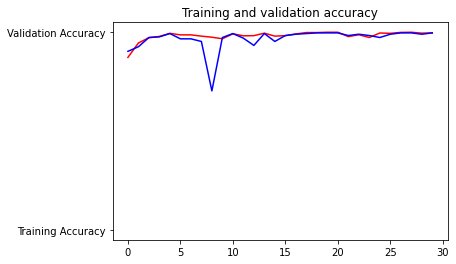

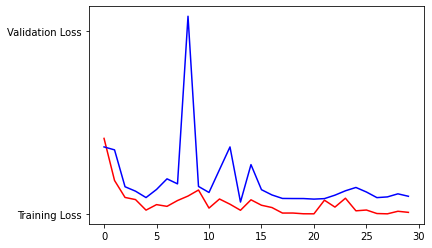

In [15]:
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()